In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv('vaccination_tweets.csv')
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [14]:
data.isnull().sum()

id                     0
user_name              0
user_location       2207
user_description     666
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2513
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  6.340000e+03    6.340000e+03    6340.000000      6340.000000   
mean   1.371201e+18    4.905232e+04    1320.693533     14789.620347   
std    3.060664e+16    3.652382e+05    3128.995563     37780.085690   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.347587e+18    1.687500e+02     210.000000       487.000000   
50%    1.360367e+18    6.325000e+02     549.000000      2725.500000   
75%    1.392858e+18    2.915250e+03    1416.500000     12186.500000   
max    1.447233e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  6340.000000  6340.000000  
mean      1.451577     8.349369  
std      11.958809    48.695323  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     4.000000  
max     678.000000  1979.000000  


In [17]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set (stopwords.words('english'))

def clean(text):
    text =str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Syed
[nltk_data]     Afaq\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


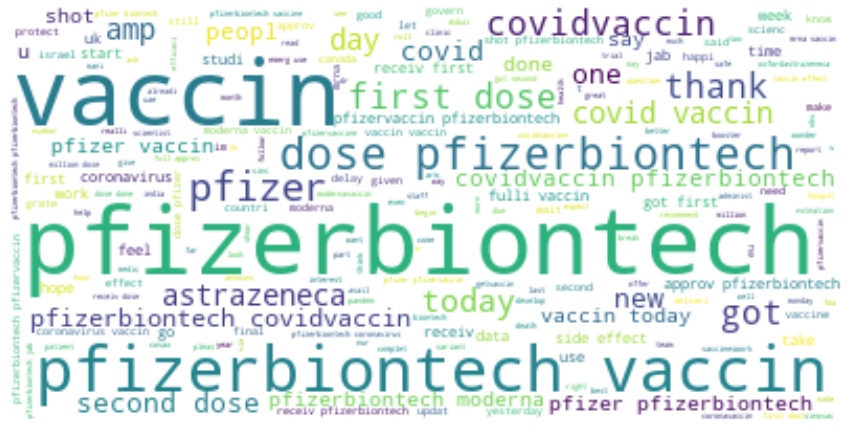

In [20]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
data["user_verified"].value_counts() 

False    5635
True      705
Name: user_verified, dtype: int64

In [21]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Syed
[nltk_data]     Afaq\AppData\Roaming\nltk_data...


                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


In [22]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [23]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  550.4610000000011
Negative:  232.19599999999994
Neutral:  5557.348999999998
